In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn import linear_model, datasets, metrics

%matplotlib inline 

In [2]:
from IPython.display import Image
from IPython.core.display import HTML

Image(url = "https://upload.wikimedia.org/wikipedia/commons/4/41/Iris_versicolor_3.jpg", width = 200, height = 200)

In [3]:
# import Iris dataset from Scikit-Learn's datasets
iris = datasets.load_iris()

print ("Shape of the data ", iris.data.shape)
print ("Shape of the data ", iris.target_names)
print ("Attributes ", iris.feature_names)

#view first 5 rows
print (iris.data[range(5)])
print (iris.target[range(5)])

Shape of the data  (150, 4)
Shape of the data  ['setosa' 'versicolor' 'virginica']
Attributes  ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
[0 0 0 0 0]


In [4]:
# show it as a table
df = pd.DataFrame(data = iris.data)
df.columns = [iris.feature_names]
df['Class'] = iris.target
df['Name'] = iris.target_names[iris.target]
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Class,Name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [5]:
X = iris.data[:, :2]
Y = iris.target

In [6]:
X[0:5]

array([[5.1, 3.5],
       [4.9, 3. ],
       [4.7, 3.2],
       [4.6, 3.1],
       [5. , 3.6]])

### Plot decision boundaries

In [7]:
logreg = linear_model.LogisticRegression(C = 1e5, solver = 'lbfgs', multi_class = 'auto', max_iter = 1000)

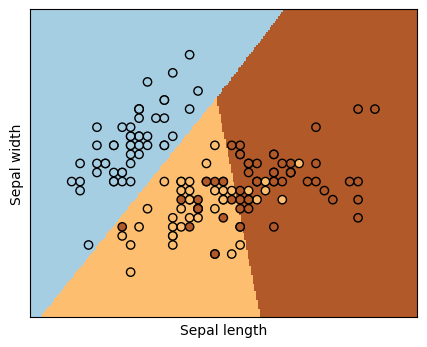

In [8]:
# point in the mesh
h = .02
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
logreg.fit(X, Y)
Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])

# put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize = (5, 4))
plt.pcolormesh(xx, yy, Z, cmap = plt.cm.Paired, shading = 'auto')

# plot the training points
plt.scatter(X[:, 0], X[:, 1], c = Y, edgecolors = 'k', cmap = plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())
plt.show()

### Plot confusion matrix

In [9]:
logreg.fit(X, Y)
predicted = logreg.predict(X)

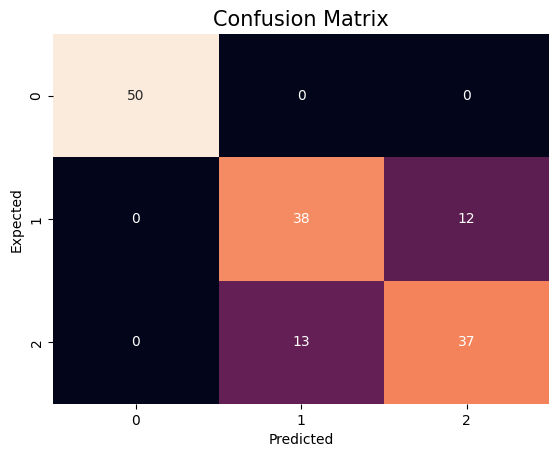

In [10]:
confusion_matrix =  pd.crosstab(index = iris.target, columns = predicted.ravel(), rownames = ['Expected'], colnames = ['Predicted'])
sns.heatmap(confusion_matrix, annot = True, square = False, fmt = '', cbar = False)
plt.title("Confusion Matrix", fontsize = 15)
plt.show()

### Classification Report

In [11]:
print (metrics.classification_report(iris.target, predicted))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.75      0.76      0.75        50
           2       0.76      0.74      0.75        50

    accuracy                           0.83       150
   macro avg       0.83      0.83      0.83       150
weighted avg       0.83      0.83      0.83       150



### Split data

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size = 0.3, random_state = 0)
X_train.shape, y_train.shape
X_test.shape, y_test.shape

((45, 4), (45,))

### Train classifiers

In [13]:
# function that generates the model, predicts test data and prints confusion matrix
def fit_predict_score(name, clf):
    clf.fit(X_train, np.ravel(y_train))
    predicted = clf.predict(X_test)
    confusion_matrix =  pd.crosstab(index = np.ravel(y_test), columns = predicted.ravel(), rownames = ['Expected'], colnames = ['Predicted'])
    sns.heatmap(confusion_matrix, annot = True, square = False, fmt = '', cbar = False)
    accuracy = np.round(metrics.accuracy_score(y_test, predicted), 3)
    plt.title(name + " " + str(accuracy), fontsize = 15)
    plt.show()
    
    print (metrics.classification_report(y_test,predicted))

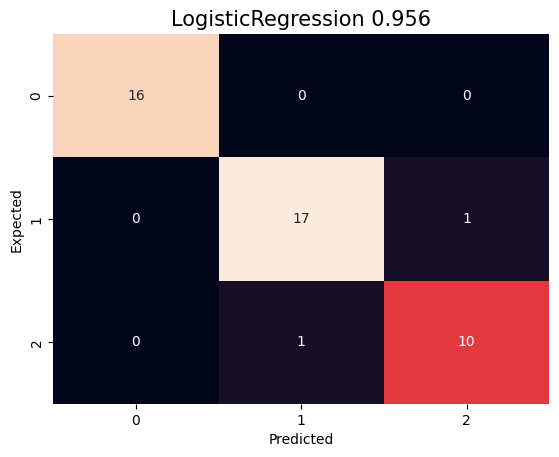

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       0.94      0.94      0.94        18
           2       0.91      0.91      0.91        11

    accuracy                           0.96        45
   macro avg       0.95      0.95      0.95        45
weighted avg       0.96      0.96      0.96        45



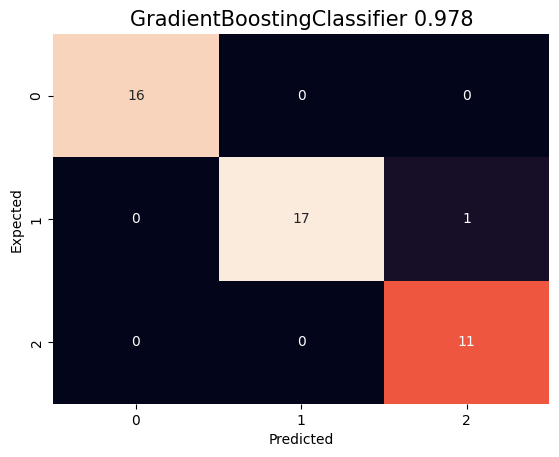

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.94      0.97        18
           2       0.92      1.00      0.96        11

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



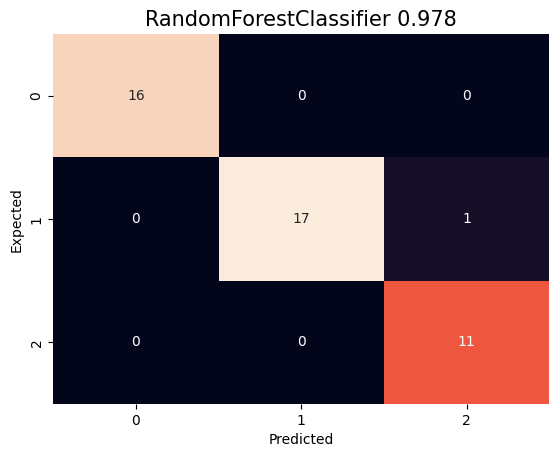

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.94      0.97        18
           2       0.92      1.00      0.96        11

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



In [14]:
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier

# initialize base classfiers
clf0 = linear_model.LogisticRegression(C = 1e5, solver = 'lbfgs', multi_class = 'auto', max_iter = 1000)

# initialize challenger classfiers
clf1 = GradientBoostingClassifier(n_estimators = 100, learning_rate = 1.0, max_depth = 1, random_state = 0)
clf2 = RandomForestClassifier(n_estimators = 100)

# create an array of classifiers
names = ["LogisticRegression", "GradientBoostingClassifier", "RandomForestClassifier"]
classifiers = [clf0, clf1, clf2]

# loop through the classifiers
for name, clf in zip(names, classifiers):
    fit_predict_score(name, clf)

## Visualize Random Forest

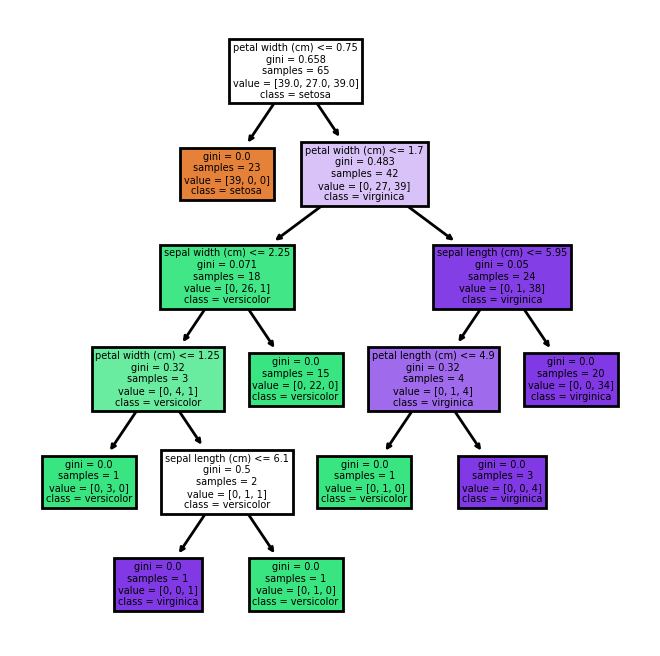

In [15]:
# visualize first tree in the forest
rf = clf2
fn = iris.feature_names
cn = iris.target_names
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (4,4), dpi = 200)
tree.plot_tree(rf.estimators_[0],
               feature_names = fn, 
               class_names = cn,
               filled = True);

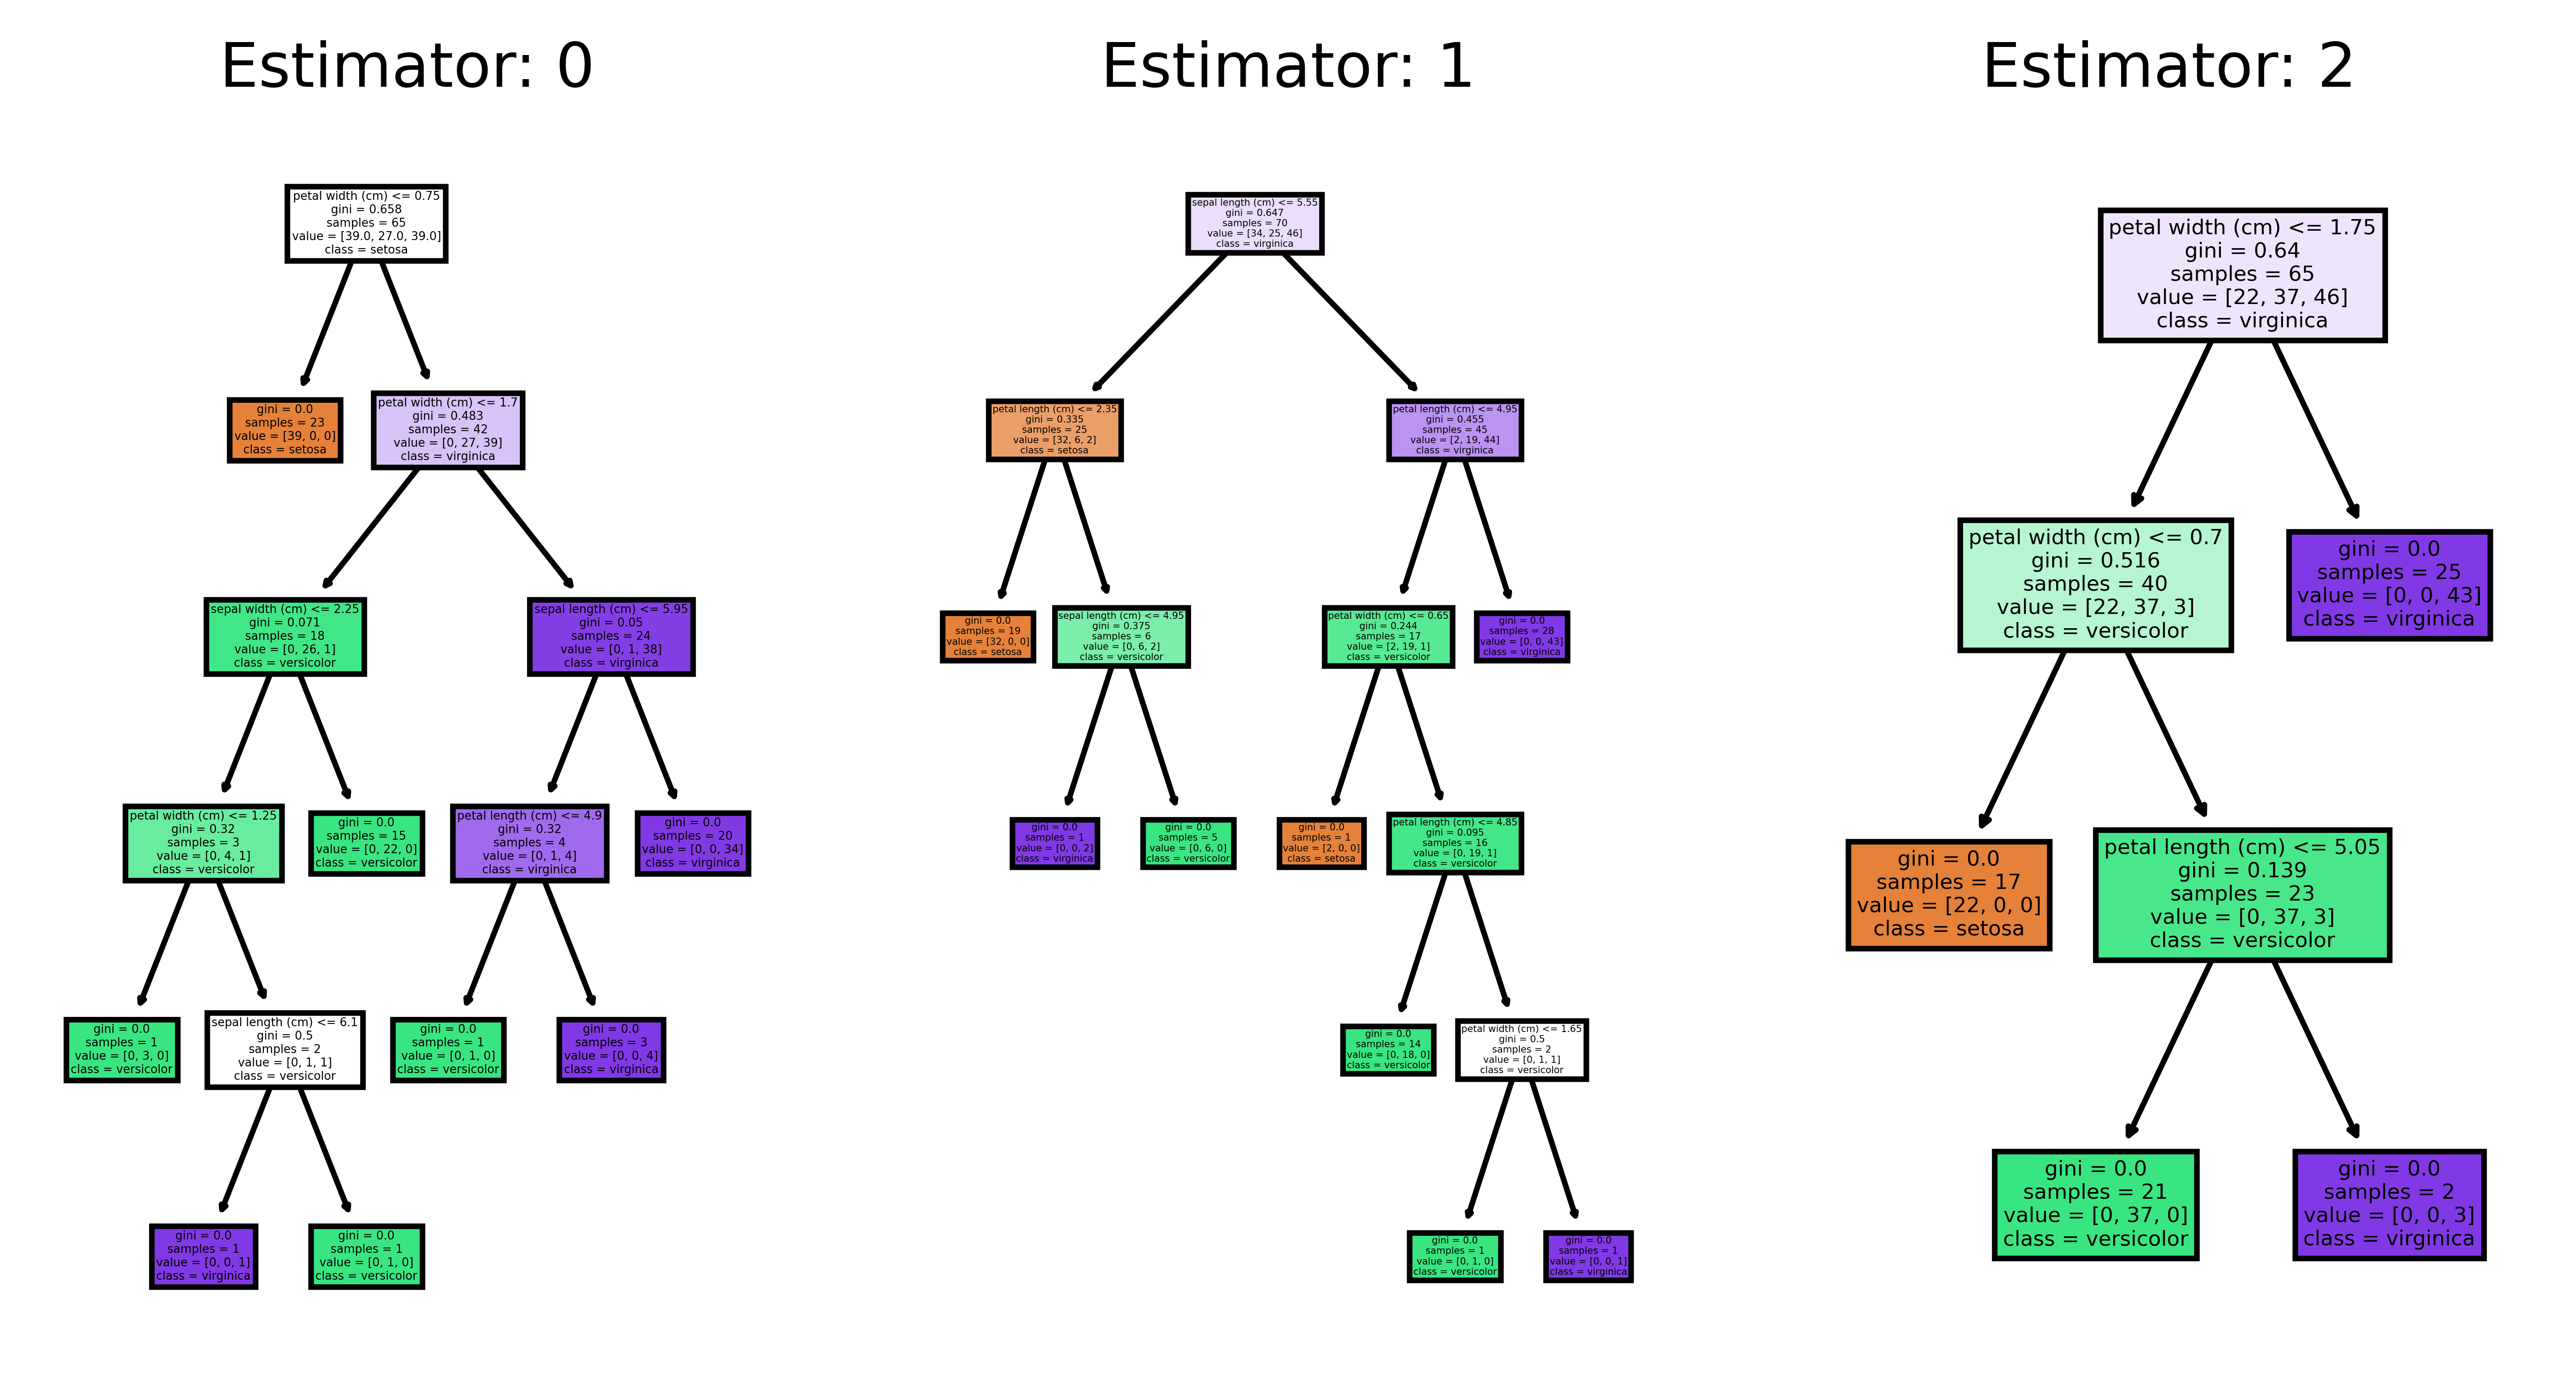

In [16]:
# visualize first few trees in the forest
fn = iris.feature_names
cn = iris.target_names
fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (8,4), dpi = 900)
for index in range(0, 3):
    tree.plot_tree(decision_tree = rf.estimators_[index],
                   feature_names = fn, 
                   class_names = cn,
                   filled = True,
                   ax = axes[index]);

    axes[index].set_title('Estimator: ' + str(index), fontsize = 11)